In [54]:
import pickle #for reading the given files
import numpy as np 
import cv2 #to read images
import matplotlib.pyplot as plt #to show images and graphs

#importing for our model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, Flatten,MaxPooling2D,Dropout,Activation
import tensorflow as tf

## Loading the data

In [36]:
with open('train_image.pkl', 'rb') as f:
    train = pickle.load(f)
with open('test_image.pkl', 'rb') as f:
    test = pickle.load(f)
with open('train_label.pkl', 'rb') as f:
    train_labels = pickle.load(f)

In [37]:
#Converting to numpy nd array
train_np = np.array(train)
test_np = np.array(test)
train_labels_np = np.array(train_labels)

In [38]:
train_np.shape,test_np.shape,train_labels_np.shape

((8000, 784), (2000, 784), (8000,))

### reshaping the images in appropriate size (-1,28,28,1)

In [39]:
train_img = train_np.reshape(-1,28,28,1)
test_img = test_np.reshape(-1,28,28,1)

In [40]:
X_train = train_img.astype('float32')
X_test = test_img.astype('float32')
#X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
#X_val /= 255

In [41]:
np.random.shuffle(train_labels_np)
set(train_labels_np)
#converting these labels to (0,1,2,3)

{0, 2, 3, 6}

In [42]:
y_train = train_labels_np
for i in range(len(y_train)):
    if(y_train[i] == 0):
        y_train[i] = 0
    elif(y_train[i] == 2):
        y_train[i] = 1
    elif(y_train[i] == 3):
        y_train[i] = 2
    else:
        y_train[i] = 3

In [43]:
y_train[:100]

array([2, 1, 0, 2, 0, 0, 1, 3, 0, 3, 1, 3, 0, 1, 3, 3, 2, 3, 0, 2, 3, 3, 1,
       3, 0, 2, 3, 2, 1, 3, 0, 2, 3, 0, 2, 0, 1, 1, 2, 3, 1, 0, 2, 1, 0, 0,
       3, 0, 0, 3, 3, 2, 0, 2, 2, 1, 1, 2, 3, 1, 0, 1, 0, 2, 3, 2, 3, 0, 2,
       1, 3, 3, 1, 2, 3, 0, 1, 1, 1, 1, 0, 3, 3, 3, 0, 2, 1, 2, 0, 3, 3, 2,
       1, 3, 0, 3, 2, 1, 1, 0])

In [44]:
#one-hot encoding the labels
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(8000, 4)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_train,y_train,test_size=0.15)
X_train.shape,X_val.shape,Y_train.shape,Y_val.shape

((6800, 28, 28, 1), (1200, 28, 28, 1), (6800, 4), (1200, 4))

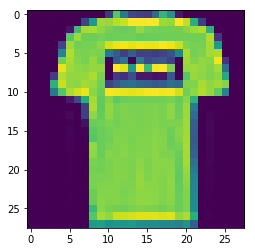

In [46]:
#checking image
plt.imshow(train_np[0].reshape(28,28))
plt.show()

# Model

## Library used to create model: Keras

We are going to create a deep learning model. We are going to use **Convolutional Neural Network(CNN)** as they are highly effective on images and give excellent results on image classification

## Our architecture: 
<ul><li> input image: 28x28x1 image</li></ul>
<ol>
<li>**Convolution layer**: filter: 3*3, units: 64, strides=1,padding: SAME (i.e image size remains same) </li>
<ul><li> output of this layer: 28x28x64</li></ul><br/>
<li>**Maxpool layer**: filter:2x2,strides=2</li>
<ul><li> output of this layer: 14x14x64</li></ul><br/>
<li>**Convolution layer**: filter: 3*3, units: 128, padding: SAME (i.e image size remains same)</li>
<ul><li> output of this layer: 14x14x128</li></ul><br/>
<li>**Maxpool layer**: filter:2x2,strides=2</li>
<ul><li> output of this layer: 7x7x128</li></ul><br/>
<li>**Dropout layer**: FOR REGULARIZATION(i.e prevent overfitting)</li>
<li>**Flatten**: Now we flatten the array to pass it through the neural network</li>
<ul><li> output of this layer: (1,6272)</li></ul><br/>
<li>**Dense layer**: 1024 units, activation: relu</li>
<li>**Output layer**: units: 4,activation: softmax</li>
</ol>

In [47]:
#creating a model
model = Sequential()

In [48]:
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(4,activation=tf.nn.softmax))

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
#train the model
model.fit(X_train, Y_train,validation_data=(X_val,Y_val), epochs=50)

Train on 6800 samples, validate on 1200 samples
Epoch 1/50
6800/6800 [==============================] - 35s 5ms/step - loss: 1.3906 - acc: 0.2403 - val_loss: 1.3863 - val_acc: 0.2442
Epoch 2/50
6800/6800 [==============================] - 34s 5ms/step - loss: 1.3866 - acc: 0.2353 - val_loss: 1.3866 - val_acc: 0.2392
Epoch 3/50
6800/6800 [==============================] - 34s 5ms/step - loss: 1.3865 - acc: 0.2456 - val_loss: 1.3865 - val_acc: 0.2400
Epoch 4/50
6800/6800 [==============================] - 34s 5ms/step - loss: 1.3865 - acc: 0.2478 - val_loss: 1.3867 - val_acc: 0.2433
Epoch 5/50
6800/6800 [==============================] - 34s 5ms/step - loss: 1.3866 - acc: 0.2366 - val_loss: 1.3866 - val_acc: 0.2350
Epoch 6/50
6800/6800 [==============================] - 35s 5ms/step - loss: 1.3866 - acc: 0.2553 - val_loss: 1.3863 - val_acc: 0.2508
Epoch 7/50
6800/6800 [==============================] - 35s 5ms/step - loss: 1.3867 - acc: 0.2454 - val_loss: 1.3859 - val_acc: 0.2583
Epoch 8

In [55]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation=tf.nn.softmax))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 128)         73856     
__________

In [58]:
model.fit(X_train, Y_train,validation_data=(X_val,Y_val), epochs=50,batch_size=64)

Train on 6800 samples, validate on 1200 samples
Epoch 1/50
6800/6800 [==============================] - 6s 922us/step - loss: 1.2445 - acc: 0.3881 - val_loss: 1.5055 - val_acc: 0.2475
Epoch 2/50
6800/6800 [==============================] - 6s 945us/step - loss: 1.2351 - acc: 0.3932 - val_loss: 1.5016 - val_acc: 0.2283
Epoch 3/50
6800/6800 [==============================] - 6s 933us/step - loss: 1.2379 - acc: 0.3959 - val_loss: 1.5164 - val_acc: 0.2367
Epoch 4/50
6800/6800 [==============================] - 6s 950us/step - loss: 1.2287 - acc: 0.3981 - val_loss: 1.5095 - val_acc: 0.2350
Epoch 5/50
6800/6800 [==============================] - 6s 953us/step - loss: 1.2377 - acc: 0.3971 - val_loss: 1.5168 - val_acc: 0.2242
Epoch 6/50
6800/6800 [==============================] - 6s 944us/step - loss: 1.2317 - acc: 0.3925 - val_loss: 1.5013 - val_acc: 0.2275
Epoch 7/50
6800/6800 [==============================] - 6s 951us/step - loss: 1.2285 - acc: 0.3935 - val_loss: 1.5214 - val_acc: 0.2375
